In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 2


In [3]:
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:5%]', 'train[5%:7%]'],
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.4THTNM_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [4]:
def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0
    return image, label

train_ds = ds_train.map(preprocess).batch(BATCH_SIZE)
val_ds = ds_val.map(preprocess).batch(BATCH_SIZE)


In [5]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze pretrained layers


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(2, activation='softmax')(x)
model = models.Model(inputs=base_model.input, outputs=output)


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)


Epoch 1/2
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 680ms/step - accuracy: 0.8074 - loss: 0.3706 - val_accuracy: 0.9462 - val_loss: 0.1226
Epoch 2/2
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 600ms/step - accuracy: 0.9785 - loss: 0.0704 - val_accuracy: 0.9419 - val_loss: 0.1147


In [8]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.9427 - loss: 0.1046
Validation Accuracy: 94.19%


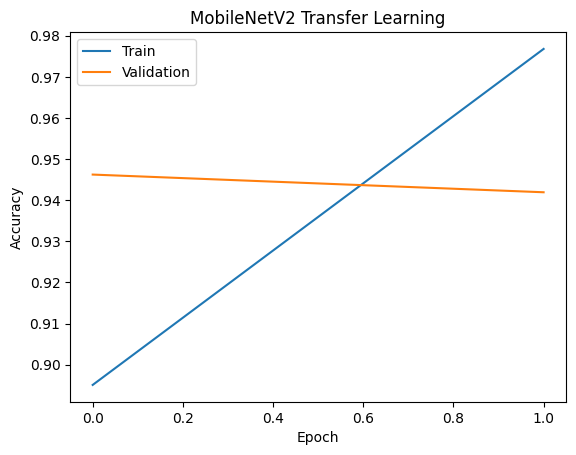

In [9]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MobileNetV2 Transfer Learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
